## import Libraries

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans 
from sklearn.manifold import TSNE
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Import DATA

In [75]:
df = pd.read_csv (r'iris.csv')


In [76]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## DATA Preporcessing

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [78]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [79]:
x = df.iloc[:, [1, 2, 3,4]].values

In [80]:
ss=StandardScaler()
scaled=ss.fit_transform(x)

In [81]:
le = LabelEncoder()
le.fit(df.Species)
color=le.transform(df.Species)

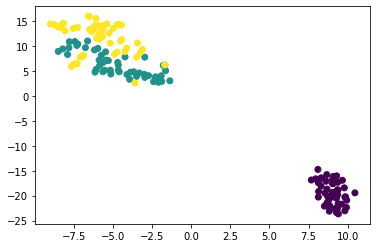

In [82]:
model=TSNE(learning_rate=100)
tsne_feature=model.fit_transform(scaled)
xs=tsne_feature[:,0]
ys=tsne_feature[:,1]
plt.scatter(xs,ys,c=color)
plt.show()

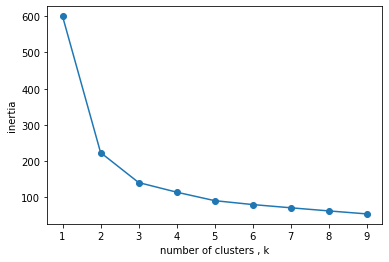

In [83]:
ks=range(1,10)
inertias=[]

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(scaled)
    inertias.append(model.inertia_)
    
    
plt.plot(ks,inertias,'-o')
plt.xlabel('number of clusters , k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [84]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)

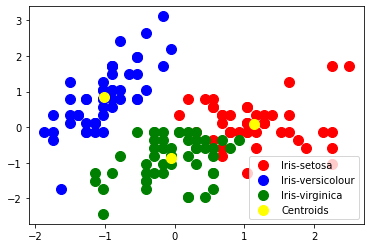

In [85]:
# Visualising the clusters - On the first two columns
plt.scatter(scaled[y_kmeans == 0, 0], scaled[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(scaled[y_kmeans == 1, 0], scaled[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(scaled[y_kmeans == 2, 0], scaled[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend();